# Exercise 8 - Cats, Cats, Cats

In [2]:
from skimage import io
from skimage.util import img_as_ubyte
import matplotlib.pyplot as plt
import numpy as np
import glob
from sklearn.decomposition import PCA
from skimage.transform import SimilarityTransform
from skimage.transform import warp
import os
import pathlib

# importa  todas las funciones, clases y variables definidas
from auxiliaryFuns import *

**Exercise 1: Preprocessing data for machine learning**

Preprocess all image in the training set. To do the preprocessing, you can use the code snippets supplied*

The result of the preprocessing is a directory containing smaller photos containing cat faces. All the preprocessed photos also have the same size.

In [ ]:
raw_dir = "data/training_cats_100"
preprocess_dir = "data/preprocessed_data_small/"

os.makedirs(preprocess_dir, exist_ok=True)
preprocess_all_cats(raw_dir, preprocess_dir)



[[154. 173.]
 [255. 163.]
 [222. 254.]]
Imagen de destino cargada correctamente.
Imagen procesada guardada: data/preprocessed_data_small/00000001_000_preprocessed.jpg
Imagen procesada guardada: data/preprocessed_data_small/00000001_005_preprocessed.jpg
Imagen procesada guardada: data/preprocessed_data_small/00000001_008_preprocessed.jpg
Imagen procesada guardada: data/preprocessed_data_small/00000001_011_preprocessed.jpg
Imagen procesada guardada: data/preprocessed_data_small/00000001_012_preprocessed.jpg
Imagen procesada guardada: data/preprocessed_data_small/00000001_016_preprocessed.jpg
Imagen procesada guardada: data/preprocessed_data_small/00000001_017_preprocessed.jpg
Imagen procesada guardada: data/preprocessed_data_small/00000001_020_preprocessed.jpg
Imagen procesada guardada: data/preprocessed_data_small/00000001_024_preprocessed.jpg
Imagen procesada guardada: data/preprocessed_data_small/00000001_027_preprocessed.jpg
Imagen procesada guardada: data/preprocessed_data_small/000

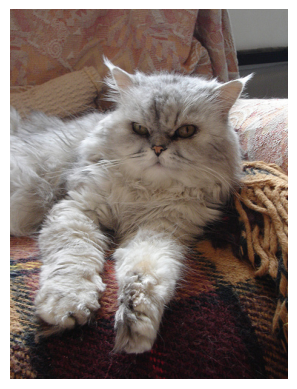

In [4]:

# ESTO PA VER SI LO HA CARGADO BIEN
import glob
import os
from skimage import io
import matplotlib.pyplot as plt
image_files = glob.glob(os.path.join(raw_dir, "*.jpg"))  # Busca todas las imágenes .jpg

# Verifica que hay imágenes
if image_files:
    first_image = io.imread(image_files[0])  # Lee la primera imagen
    plt.imshow(first_image)
    plt.axis('off')  # Oculta los ejes
    plt.show()
else:
    print("No se encontraron imágenes en el directorio.")


## Gathering data into a data matrix

To start, we want to collect all the image data into a data matrix. The matrix should have dimensions [n_samples, n_features] 
-  n_samples is the number of photos in our training set 
-  n_features is the number of values per image. Since we are working with RGB images, the number of features are given by n_features = height * width * channels, where channels = 3.

The data matrix can be constructed by:

- Find the number of image files in the preprocessed folder using glob. Look at the preprocess_all_cats function to get an idea of how to use glob.
- Read the first photo and use that to find the height and width of the photos
- Set n_samples and n_features
- Make an empty matrix data_matrix = np.zeros((n_samples, n_features))
- Read the image files one by one and use flatten() to make each image into a 1-D vector (flat_img).
- Put the image vector (flat_img) into the data matrix by for example data_matrix[idx, :] = flat_img , where idx is the index of the current image.

**Exercise 2:** *Compute the data matrix.* 


MIs apuntes:
- Crear una matriz de datos (data_matrix) que contenga las imágenes procesadas, donde cada fila corresponde a una imagen, y cada columna corresponde a un píxel de la imagen (en forma de un vector 1D)   
- Utilizar las imágenes preprocesadas en un directorio específico y convertir cada imagen 2D (o 3D, dependiendo de los canales) en un vector 1D.

In [ ]:
#Esto devuelve una lista de las rutas de archivo de todas las imágenes .jpg en el directorio preprocess_dir.
files = glob.glob(f"{preprocess_dir}/*.jpg")

# todas las imagenes tienen las mismas dimensiones post el preprocesado so, sirve oara saber info de todas
height, width, channels = io.imread(files[0]).shape
    # tiene tantas filas como imágenes 
    # tantas columnas como píxeles por imagen  360*360*3
data_matrix = np.zeros((len(files), height * width * channels))
data_matrix.size
for i, f in enumerate(files):
   # Convierte cada imagen a un vector 1D (utilizando .flatten()) y lo coloca en la matriz.

    data_matrix[i, :] = io.imread(f).flatten()

print(height,width,channels)
print(data_matrix.shape)

360 360 3
(100, 388800)



## Compute and visualize a mean cat

In the data matrix, one row is one cat. You can therefore compute an average cat, The Mean Cat by computing one row, where each element is the average of the column.



**Exercise 3:** *Compute the average cat.*

In [ ]:
average_cat = np.mean(data_matrix, axis=0) # saca la media de cada columna y da un vector con ella
print(average_cat)

[ 90.21  77.8   72.38 ... 103.25  95.79  89.52]



**Exercise 4:** *Visualize the Mean Cat* 


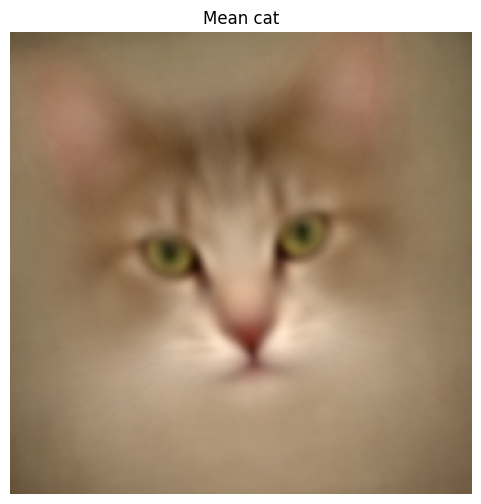

In [12]:
average_cat_img = create_u_byte_image_from_vector(average_cat, height, width, channels)
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
plt.imshow(average_cat_img)
ax.set_title("Mean cat")
ax.set_axis_off()
plt.show()


## Find a missing cat or a cat that looks like it (using image comparison)

**Exercise 5:** *Decide that you quickly buy a new cat that looks very much like the missing cat - so nobody notices* 

To find a cat that looks like the missing cat, you start by comparing the missing cat pixels to the pixels of the cats in the training set. The comparison between the missing cat data and the training data can be done using the sum-of-squared differences (SSD).

In [ ]:
# :)

**Exercise 6:** Use the preprocess_one_cat function to preprocess the photo of the poor missing cat


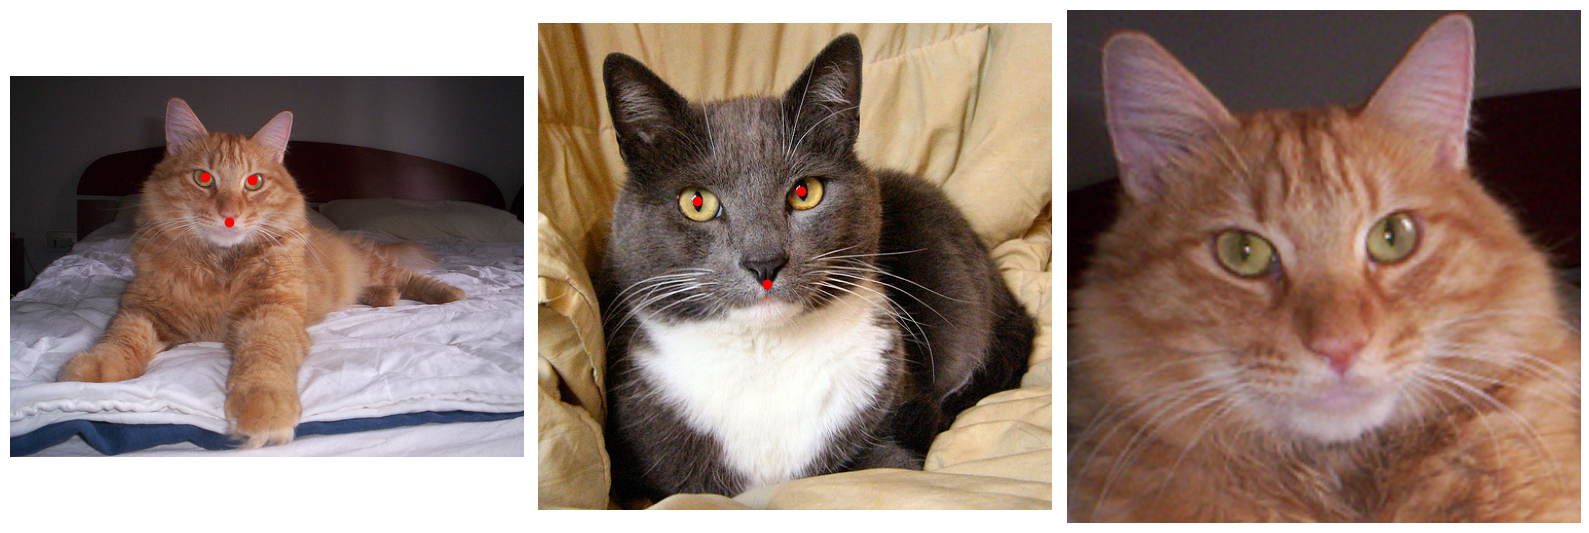

In [19]:
preprocess_one_cat()
# First image is the missing cat, second one the model cat 
# and the third one is the missing cat aligned and cropped
# Now there is a new file data/MissingCatProcessed.jpg

**Exercise 7:** *Flatten the pixel values of the missing cat so it becomes a vector of values.*


Para comparar tu gato con todos los que ha en el data set


In [28]:
im_miss = io.imread("data/MissingCatProcessed.jpg")
im_miss_flat = im_miss.flatten()
print(im_miss_flat)

[ 54  44  52 ... 202 159 117]


**Exercise 8:** *Subtract you missing cat data from all the rows in the data_matrix and for each row compute the sum of squared differences. This can for example be done by:*

In [29]:
# esto renta cada fila de la matriz con la fila del gato
sub_data = data_matrix - im_miss_flat
#sub_data es una nueva matriz donde cada fila es la diferencia 
# entre la imagen faltante y una imagen de entrenamiento.

# calcula L2 para cada fila y te devuleve un valor. axis1 indica qeu debe ir fila por fila
    #esto genera un vector, con la es la distancia Euclidiana (L2)
    #  entre la imagen faltante y una imagen del conjunto de entrenamiento.
sub_distances = np.linalg.norm(sub_data, axis=1)
print(sub_distances)

[47281.68683539 41374.14074032 48887.3922704  56602.31496149
 53648.62755933 55735.10365111 47249.47984899 36823.89971201
 47193.93991817 67731.54073251 35932.39168216 53647.11831963
 41389.00962816 57355.9634563  44517.77602262 54524.06764907
 56404.66540101 42999.92936041 57124.4567589  45191.48756127
 55387.73921185 45338.97074262 40874.45109112 56817.41071186
 44662.1847428  53733.43595937 51523.35842121 45961.01058506
 38207.78857772 45610.40710189 37382.35892771 44349.09421848
 33047.79729422 66950.25090319 51988.35140683 42104.00015438
 40053.19414229 53890.76264073 53155.94851943 49089.1236528
 48103.44163363 42752.92083589 51811.11957872 53336.63432389
 50297.63856286 41108.64167058 50570.99101263 59513.64532609
 54124.36164982 37078.81918292 53098.94877491 48229.62840413
 43608.42976994 56392.60650121 49589.94639037 42342.31039988
 58234.3077232  54843.24641193 54794.18998398 50612.587545
 50991.22544125 61511.42682462 46653.90820714 47219.8996187
 51810.17583448 59395.649436

**Exercise 9:** *Find the training cat that looks most like your missing cat by finding the cat, where the SSD is smallest. You can for example use `np.argmin`.*

In [30]:
min_idx = np.argmin(sub_distances) #encuentra el indice para el valor minimo
print(min_idx)

32


Esto significa que la 33 imagen en el conjunto de entrenamiento (índice 32) es la más parecida al gato faltante.


**Exercise 10:** *Extract the found cat from the data_matrix and use `create_u_byte_image_from_vector` to create an image that can be visualized. Did you find a good replacement cat?*


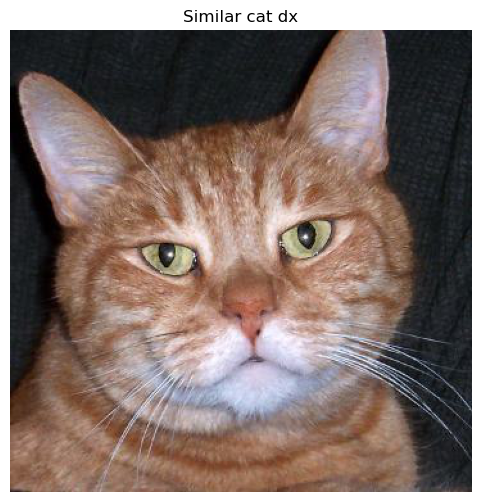

In [32]:
                                        #    im_vec, height, width, channels
similar_cat = create_u_byte_image_from_vector(data_matrix[min_idx, :], height, width, channels) # min_ es la fila , : es la columnas

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
plt.imshow(similar_cat)
ax.set_title("Similar cat dx")
ax.set_axis_off()
plt.show()


**Exercise 11:** *You can use `np.argmax` to find the cat that looks the least like the missing cat.*

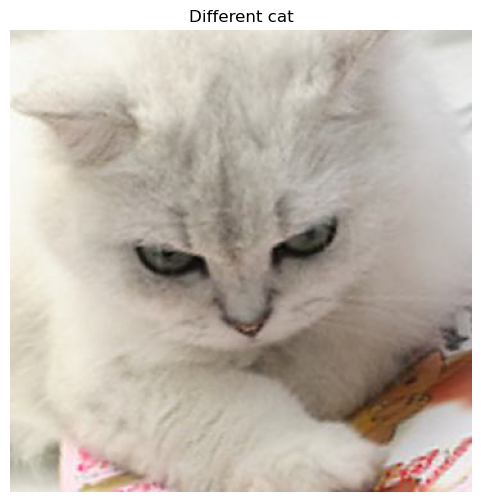

In [ ]:
# esto es para el gato que menos se paerece, es decir el qeu mayor es la distancia
max_idx = np.argmax(sub_distances)
different_cat = create_u_byte_image_from_vector(data_matrix[max_idx, :], height, width, channels)
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
plt.imshow(different_cat)
ax.set_title("Different cat")
ax.set_axis_off()
plt.show()

## Principal component analysis on the cats PCA

El Análisis de Componentes Principales (PCA) es una técnica de reducción de dimensionalidad que se utiliza para transformar datos de alta dimensión en un espacio de menor dimensión, mientras se conserva la mayor cantidad posible de información (varianza).

To compute the PCA, we use the sci-kit learn PCA. Note that this version of PCA automatically centers data. It means that it will subtract the average cat from all cats for you.

**Exercise 12:** *Start by computing the first 50 principal components:*

In [ ]:
print("Computing PCA")
cats_pca = PCA(n_components=50) # calcula las 50 primeras componentes principales.
cats_pca.fit(data_matrix) #realiza los cálculos matemáticos para encontrar estas componentes.

Computing PCA


PCA(n_components=50)

Las componentes principales (en el contexto de PCA, Análisis de Componentes Principales) son nuevas variables calculadas a partir de las variables originales del conjunto de datos.

**Exercise 13:** *Plot the amount of the total variation explained by each component as function of the component number.*

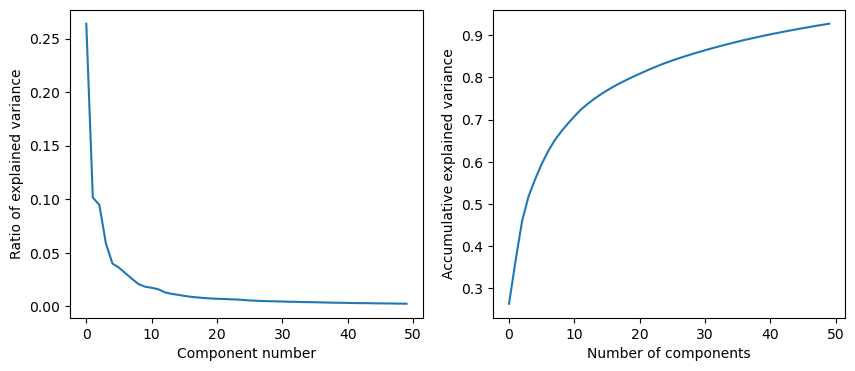

In [42]:
#Este vector muestra cuánto de la información (varianza) original se conserva en cada componente principal.
#Varianza explicada ayuda a decidir cuántos componentes son necesarios para capturar la mayor parte de la 
# información de los datos.
explained_variance = cats_pca.explained_variance_ratio_


fig, ax = plt.subplots(1,2, figsize=(10,4))
#Muestra la razón de varianza explicada por cada componente principal.
#Es útil para identificar cuáles componentes explican más información (varianza).

ax[0].plot(explained_variance)
ax[0].set_ylabel("Ratio of explained variance")
ax[0].set_xlabel("Component number")

#Muestra la varianza explicada acumulada.
#Permite ver cómo se acumula la varianza explicada al sumar más componentes.
#Esto ayuda a determinar cuántos componentes son necesarios para explicar un 
# porcentaje significativo (por ejemplo, el 95%) de la varianza total.
ax[1].plot(explained_variance.cumsum())
ax[1].set_ylabel("Accumulative explained variance")
ax[1].set_xlabel("Number of components")
plt.show()

- Primer gráfico (varianza explicada por componente):

Una curva decreciente: Las primeras componentes explican más información que las posteriores.
Identifica el "codo" (el punto donde agregar más componentes no incrementa significativamente la varianza explicada).

- Segundo gráfico (varianza acumulada):

Una curva creciente: Muestra cuánto de la varianza total se acumula al agregar más componentes.
Puedes usarlo para determinar cuántas componentes necesitas para explicar un porcentaje deseado de la varianza (como el 90% o 95%).

**Exercise 14:** *How much of the total variation is explained by the first component?*

In [43]:
print("The first component explains {:.2f}% of the variance".format(explained_variance[0] * 100))

The first component explains 26.38% of the variance


Esto significa que la primera componente por sí sola capta más de un cuarto de toda la variación en los datos originales.

**Exercise 15:** *Project the cat images into PCA space*:

In [ ]:
components = cats_pca.transform(data_matrix)

#components):

#Es una matriz donde:
#- Las filas corresponden a las imágenes originales.
# - Las columnas corresponden a los valores de las imágenes proyectados en las  50 primeras componentes principales (si usaste n_components=50).

# Contiene una versión comprimida de los datos originales. Cada imagen ahora está representada solo por 50 valores 
# (en lugar de todos los píxeles originales), conservando la mayoría de la información relevante.


[[ -9512.53585389  -5877.99275009 -14231.04731378 ...   1753.09545959
    -649.49018682   -771.18811901]
 [ 27705.19640226  -5042.40157782   3020.54554637 ...    113.02216811
   -1964.84274924   1990.12067184]
 [-15453.53229597   5330.47270215  13081.59775573 ...  -3391.48518777
    2140.59685472   1849.76770048]
 ...
 [-30258.64239394 -21650.00603505   5805.84955334 ...    -80.57949144
   -4202.68404065   1421.70691137]
 [ -4239.32770502  29866.82860128   4954.97231775 ...  -1615.80182979
    -588.27986289   2756.3523665 ]
 [-15305.94594207 -10111.41833569  -8766.65169621 ...  -6058.00075488
    2910.5445411    1033.28117671]]


**Exercise 16:** *Plot the PCA space by plotting all the cats first and second PCA coordinates in a (x, y) plot*

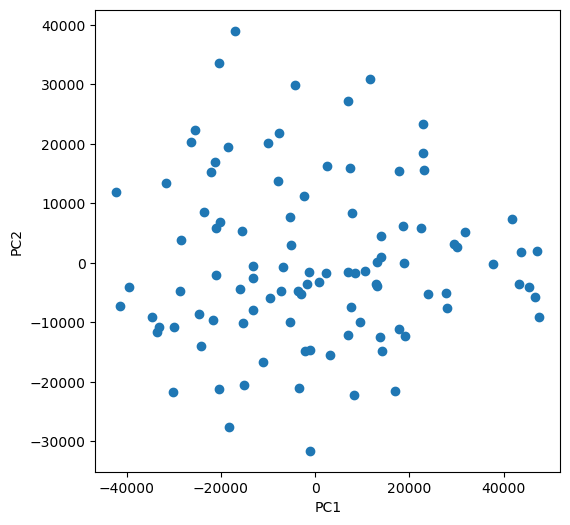

In [47]:
pc_1 = components[:, 0] # primera componente y abajo la segunda
pc_2 = components[:, 1] # (fila, columna)  #(imagen, componente)
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.plot(pc_1, pc_2, "o")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
plt.show()

## Cats in space


We would like to explore what the PCA learnt about our cats in the data set.




### Extreme cats

**Exercise 17:** *Use `np.argmin` and `np.argmax` to find the ids of the cats that have extreme values in the first and second PCA coordinates. Extract the cats data from the data matrix and use `create_u_byte_image_from_vector` to visualize these cats. Also plot the PCA space where you plot the extreme cats with another marker and color.*

esto te da los datos , que estan más lejos

In [24]:
def nargmax(arr, n):
    # Like np.argmax but returns the n largest values
    idx = np.argpartition(arr, -n)[-n:]
    return idx[np.argsort(arr[idx])][::-1]

def nargmin(arr, n):
    # Like np.argmin but returns the n smallest values
    idx = np.argpartition(arr, n)[:n]
    return idx[np.argsort(arr[idx])]

def plot_pca_space_and_img(pc_idx):
    _, ax = plt.subplots(1, 2, figsize=(6, 3))
    ax[0].plot(pc_1, pc_2, "o")
    ax[0].plot(pc_1[pc_idx], pc_2[pc_idx], "ro", markersize=10)
    ax[0].set_xlabel("PC1")
    ax[0].set_ylabel("PC2")
    
    img = create_u_byte_image_from_vector(data_matrix[pc_idx, :], height, width, channels)
    ax[1].imshow(img)
    ax[1].set_title("Cat")
    ax[1].set_axis_off()
    plt.show()

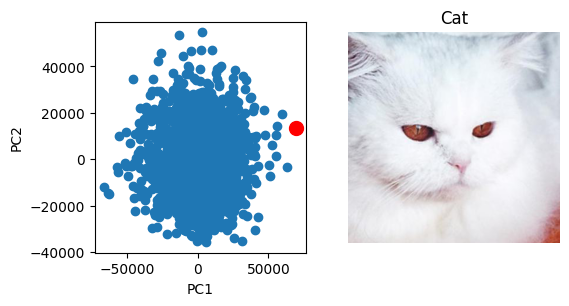

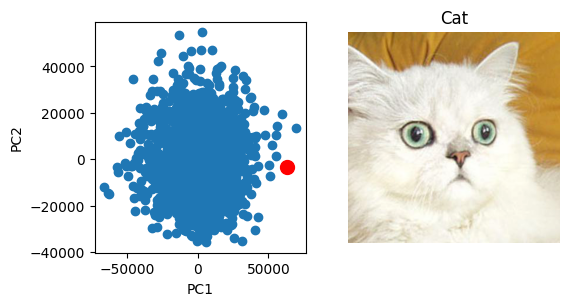

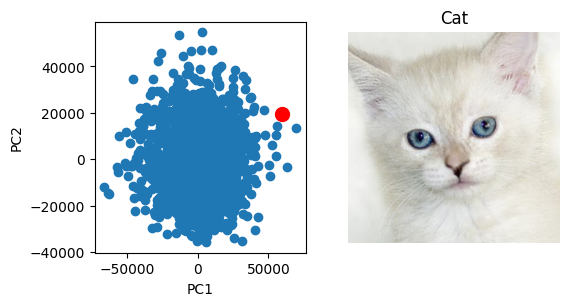

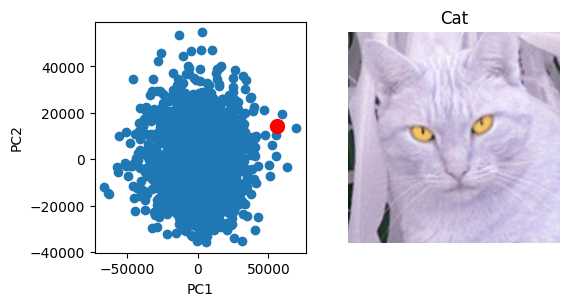

In [25]:
# Check the 4 largest values of PC1
max_pc1s = nargmax(pc_1, 4)
for i in max_pc1s:
    plot_pca_space_and_img(i)

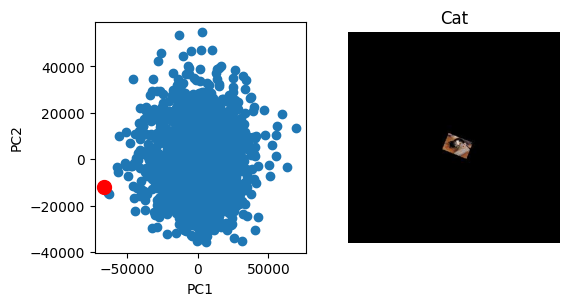

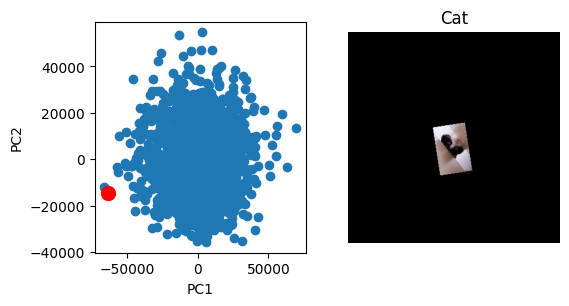

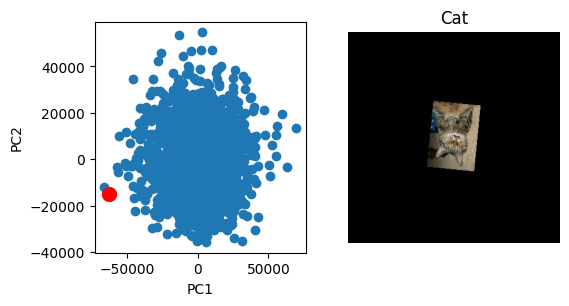

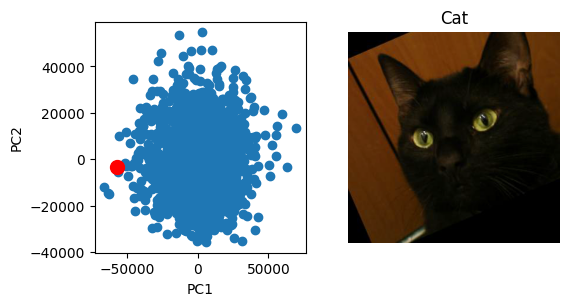

In [26]:
# Check the 4 smallest values of PC1
min_pc1s = nargmin(pc_1, 4)
for i in min_pc1s:
    plot_pca_space_and_img(i)

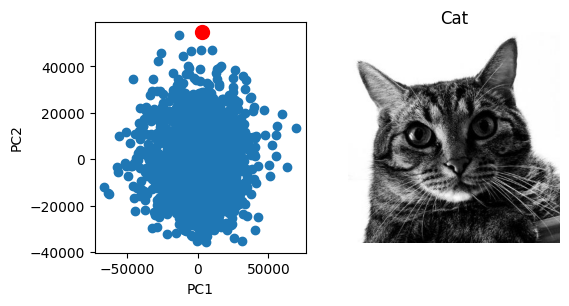

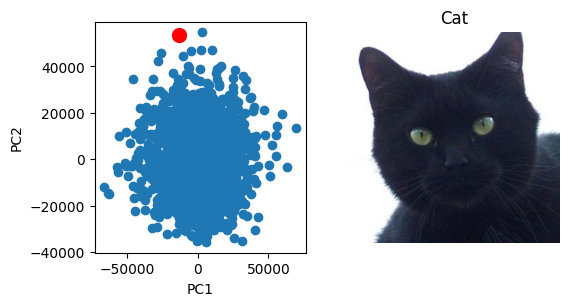

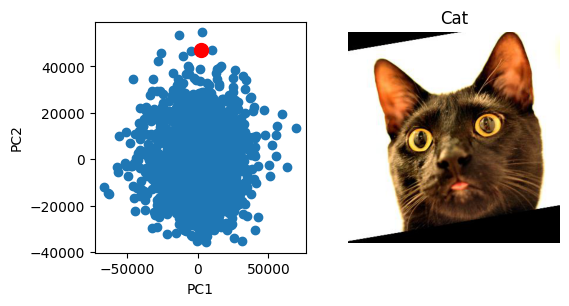

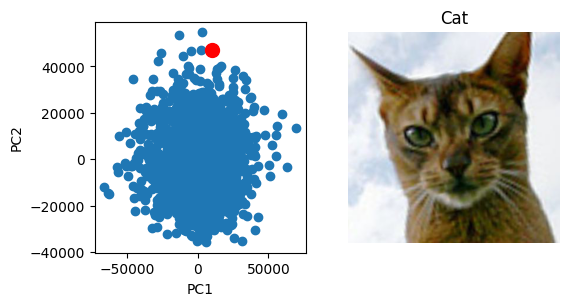

In [27]:
# Check the 4 largest values of PC2
max_pc2s = nargmax(pc_2, 4)
for i in max_pc2s:
    plot_pca_space_and_img(i)

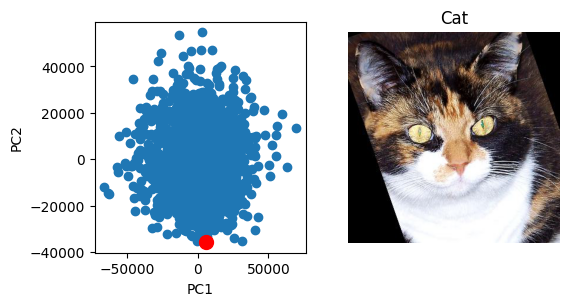

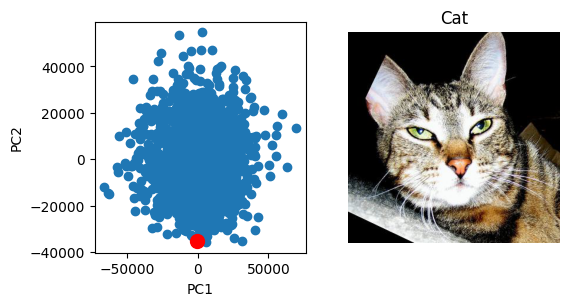

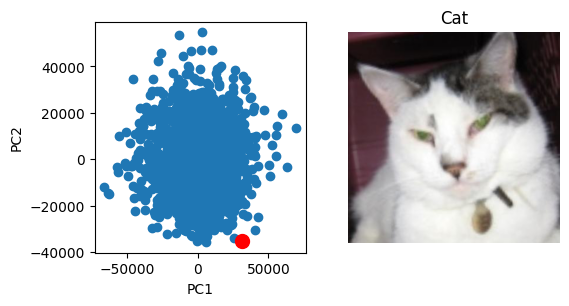

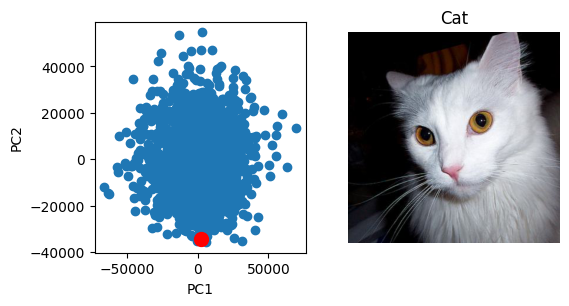

In [28]:
# Check the 4 smallest values of PC2
min_pc2s = nargmin(pc_2, 4)
for i in min_pc2s:
    plot_pca_space_and_img(i)


**Exercise 18:** *How do these extreme cat photo look like? Are some actually of such bad quality that they should be removed from the training set? If you remove images from the training set, then you should run the PCA again. Do this until you are satisfied with the quality of the training data.*


In [29]:
filtered_matrix = data_matrix.copy()

# Remove the 8 largest values of PC1, 5 smallest values of PC1,
# 5 largest values of PC2 and 5 smallest values of PC2
max_pc1s = nargmax(pc_1, 8)
min_pc1s = nargmin(pc_1, 5)
max_pc2s = nargmax(pc_2, 5)
min_pc2s = nargmin(pc_2, 5)

remove_idx = np.concatenate((max_pc1s, min_pc1s, max_pc2s, min_pc2s))
filtered_matrix = np.delete(filtered_matrix, remove_idx, axis=0)

# Recompute PCA
cats_pca = PCA(n_components=50)
cats_pca.fit(filtered_matrix)
components = cats_pca.transform(filtered_matrix)

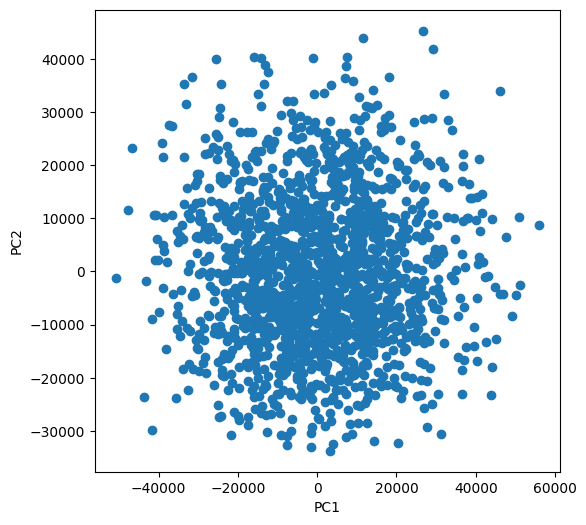

In [30]:
pc_1 = components[:, 0] 
pc_2 = components[:, 1]
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.plot(pc_1, pc_2, "o")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
plt.show()

### The first synthesized cat
**Exercise 19:** *Create your first fake cat using the average image and the first principal component. You should choose experiment with different weight values (w)* :

In [31]:
print("Maximal value of PC1: {:.8f}".format(np.max(cats_pca.components_[0, :])))
print("Minimal value of PC1: {:.8f}".format(np.min(cats_pca.components_[0, :])))

Maximal value of PC1: -0.00027527
Minimal value of PC1: -0.00236509


In [32]:
w = 60000
synth_cat = average_cat + w * cats_pca.components_[0, :]

**Exercise 20:** *Use `create_u_byte_image_from_vector` visualize your fake cat.*

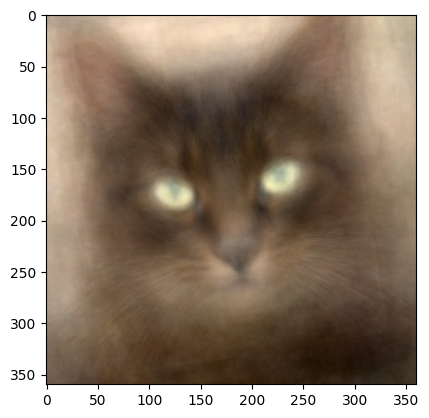

In [33]:
synth_cat_img = create_u_byte_image_from_vector(synth_cat, height, width, channels)
plt.imshow(synth_cat_img)
plt.show()

**Exercise 21:** *Synthesize some cats, where you use both the first and second principal components and select their individual weights based on the PCA plot.*

In [34]:
print("Maximal value of PC2: {:.8f}".format(np.max(cats_pca.components_[1, :])))
print("Minimal value of PC2: {:.8f}".format(np.min(cats_pca.components_[1, :])))

Maximal value of PC2: 0.00378573
Minimal value of PC2: -0.00209227


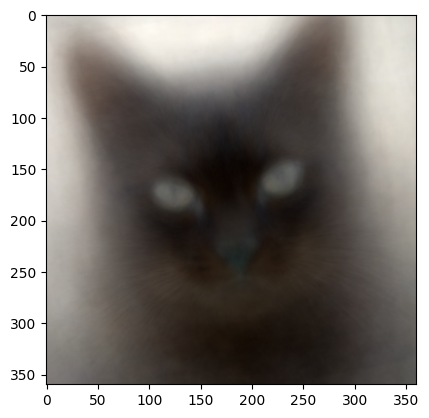

In [35]:
w0, w1 = 60000, 60000
synth_cat = average_cat + w0 * cats_pca.components_[0, :] + w1 * cats_pca.components_[1, :]
synth_cat_img = create_u_byte_image_from_vector(synth_cat, height, width, channels)
plt.imshow(synth_cat_img)
plt.show()

### The major cat variation in the data set


**Exercise 22:** *Synthesize and visualize cats that demonstrate the first three major modes of variation. Try show the average cat in the middle of a plot, with the negative sample to the left and the positive to the right. Can you recognise some visual patterns in these modes of variation?*

In [36]:
def visualize_mode_of_variation(m):
    synth_cat_plus = average_cat + 3 * np.sqrt(cats_pca.explained_variance_[m]) * cats_pca.components_[m, :]
    synth_cat_minus = average_cat - 3 * np.sqrt(cats_pca.explained_variance_[m]) * cats_pca.components_[m, :]
    
    fig, ax = plt.subplots(1, 3, figsize=(12, 4))
    ax[0].imshow(create_u_byte_image_from_vector(synth_cat_minus, height, width, channels))
    ax[0].set_title("Cat - 3$\sigma$")
    ax[1].imshow(create_u_byte_image_from_vector(average_cat, height, width, channels))
    ax[1].set_title("Average cat")
    ax[2].imshow(create_u_byte_image_from_vector(synth_cat_plus, height, width, channels))
    ax[2].set_title("Cat + 3$\sigma$")
    fig.suptitle("Mode of variation PC{}".format(m + 1))

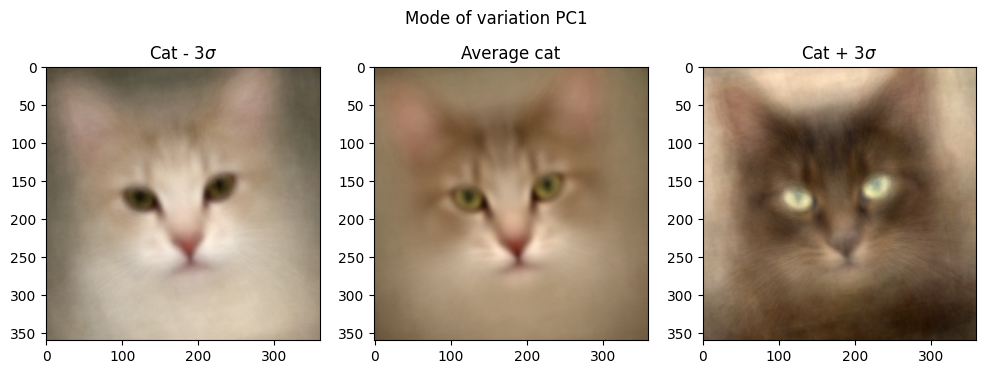

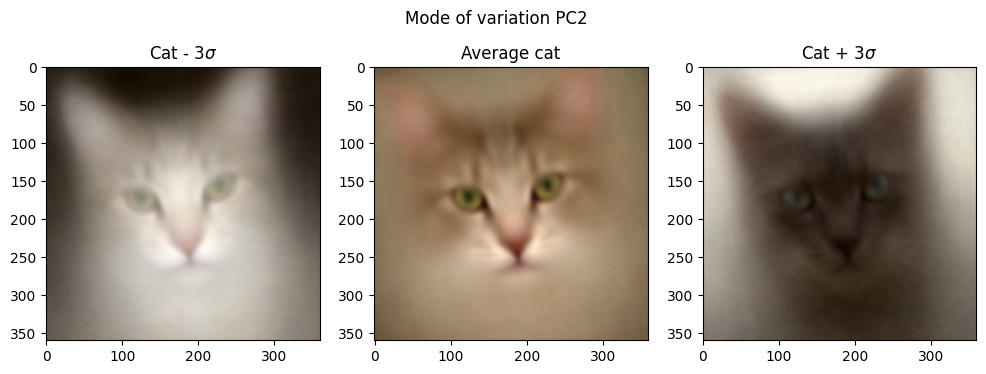

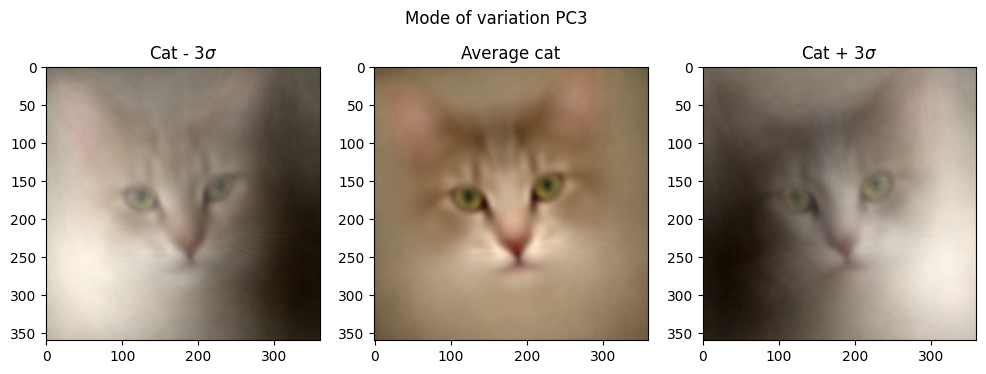

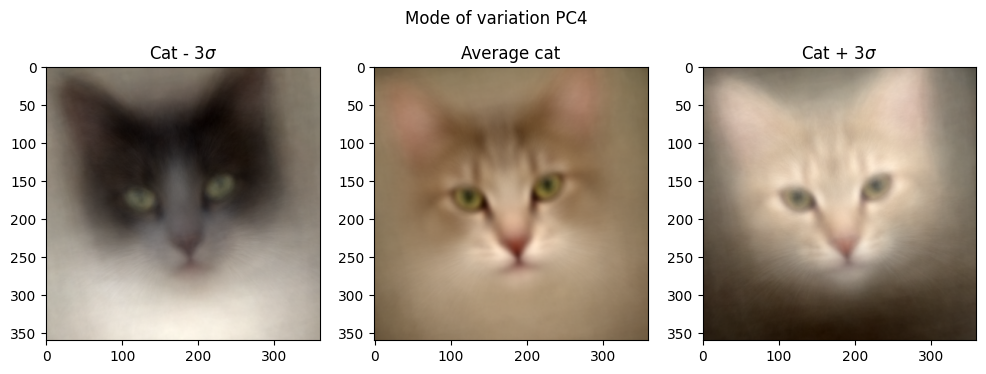

In [37]:
visualize_mode_of_variation(m = 0)
visualize_mode_of_variation(m = 1)
visualize_mode_of_variation(m = 2)
visualize_mode_of_variation(m = 3)

### The Cat Synthesizer (EigenCats)
**Exercise 23:** *Generate as many cat photos as your heart desires.*.


In [49]:
def random_cat_generator():
    w = np.random.randn(50)*50000
    w = w*np.exp(-np.arange(50)/5) # Decrease the influence of the higher PCs
    synth_cat = average_cat + np.dot(w, cats_pca.components_)
    return create_u_byte_image_from_vector(synth_cat, height, width, channels)

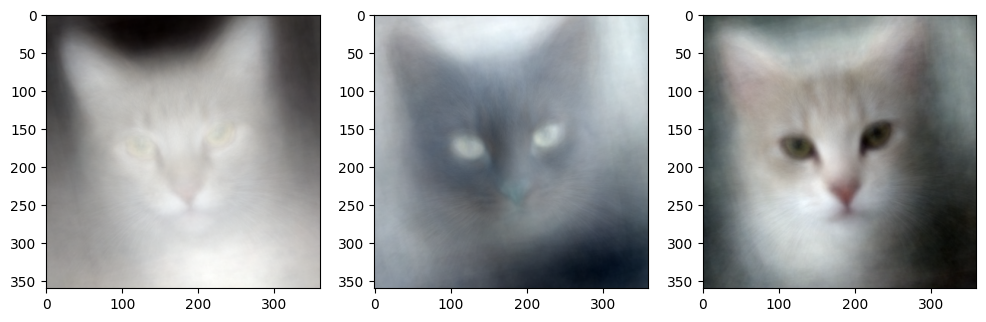

In [56]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].imshow(random_cat_generator())
ax[1].imshow(random_cat_generator())
ax[2].imshow(random_cat_generator())
plt.show()

## Cat identification in PCA space


**Exercise 24:** *Start by finding the PCA space coordinates of your missing cat:*


In [57]:
im_miss = io.imread("data/MissingCatProcessed.jpg")
im_miss_flat = im_miss.flatten()
im_miss_flat = im_miss_flat.reshape(1, -1)
pca_coords = cats_pca.transform(im_miss_flat)
pca_coords = pca_coords.flatten()

**Exercise 25:** *Plot all the cats in PCA space using the first two dimensions. Plot your missing cat in the same plot, with another color and marker. Is it placed somewhere sensible and does it have close neighbours?*

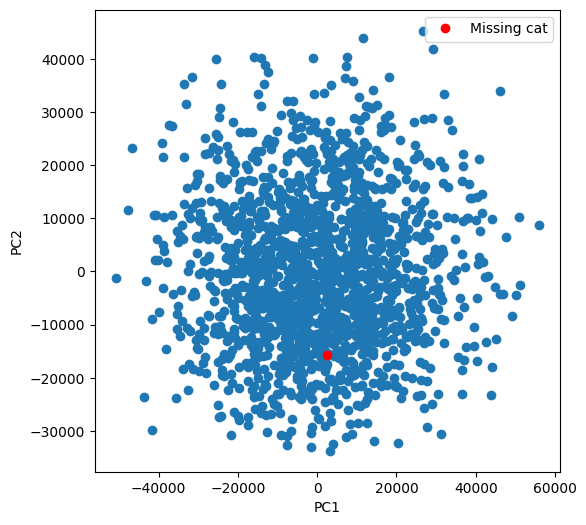

In [58]:
components = cats_pca.transform(filtered_matrix)
pc_1 = components[:, 0] 
pc_2 = components[:, 1]
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.plot(pc_1, pc_2, "o")
ax.plot(pca_coords[0], pca_coords[1], "ro", label="Missing cat")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
plt.legend()
plt.show()

**Exercise 26:** *Generate synthetic versions of your cat, where you change the n_components_to_use from 1 to for example 50.*

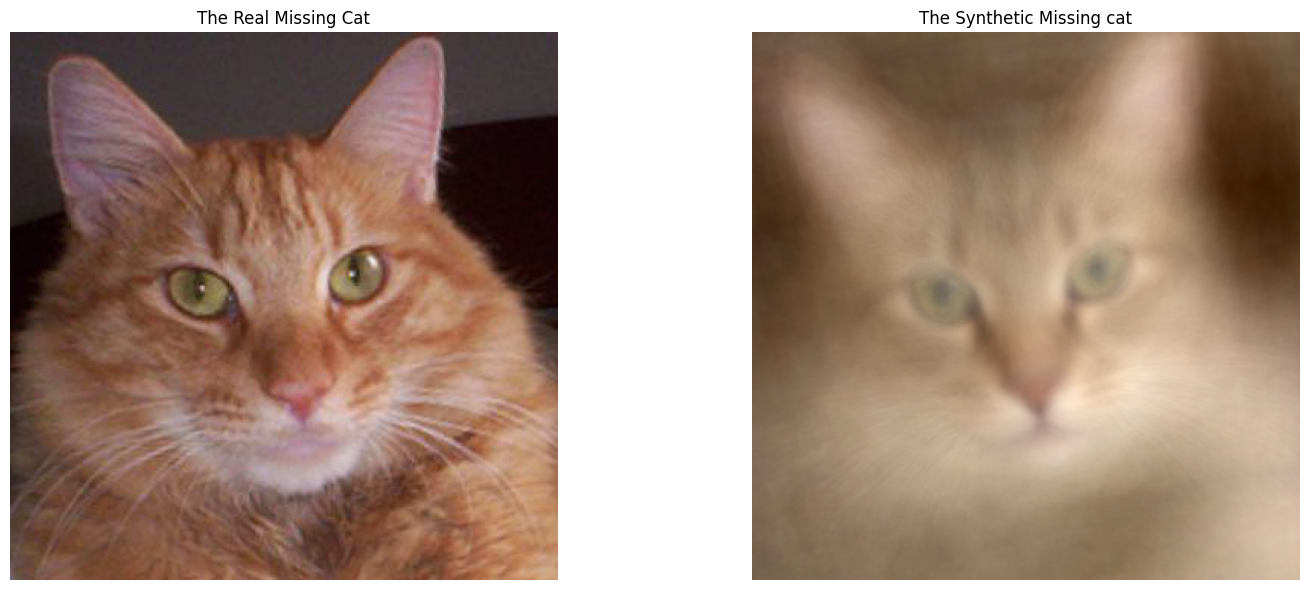

In [63]:
n_components_to_use = 25
synth_cat = average_cat
for idx in range(n_components_to_use):
	synth_cat = synth_cat + pca_coords[idx] * cats_pca.components_[idx, :]

fig, ax = plt.subplots(ncols=2, figsize=(16, 6))
ax[0].imshow(im_miss)
ax[0].set_title('The Real Missing Cat')
ax[1].imshow(create_u_byte_image_from_vector(synth_cat, height, width, channels))
ax[1].set_title('The Synthetic Missing cat')
for a in ax:
	a.axis('off')
plt.tight_layout()
plt.show()

**Exercise 27:** *Find the id of the cat that has the smallest and largest distance in PCA space to your missing cat. Visualize these cats. Are they as you expected? Do you think your friends and family will notice a difference?*

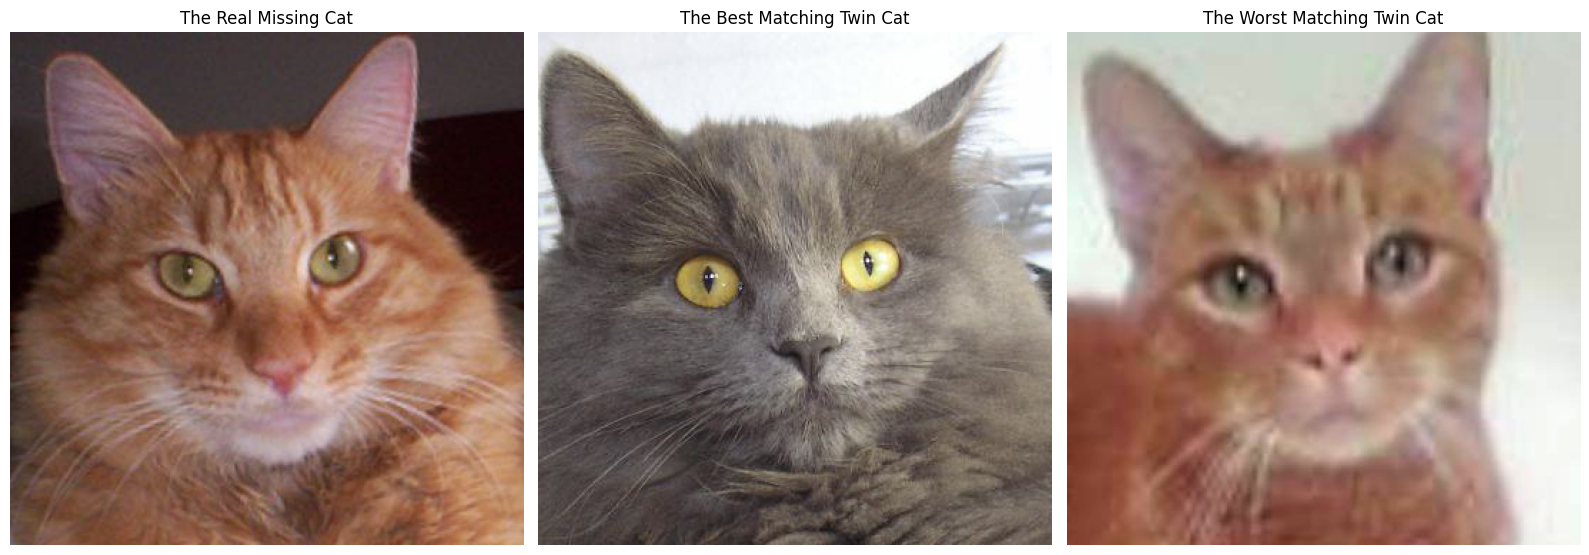

In [64]:
comp_sub = components - pca_coords
pca_distances = np.linalg.norm(comp_sub, axis=1)

best_match = np.argmin(pca_distances)
best_twin_cat = data_matrix[best_match, :]
worst_match = np.argmax(pca_distances)
worst_twin_cat = data_matrix[worst_match, :]
fig, ax = plt.subplots(ncols=3, figsize=(16, 6))
ax[0].imshow(im_miss)
ax[0].set_title('The Real Missing Cat')
ax[1].imshow(create_u_byte_image_from_vector(best_twin_cat, height, width, channels))
ax[1].set_title('The Best Matching Twin Cat')
ax[2].imshow(create_u_byte_image_from_vector(worst_twin_cat, height, width, channels))
ax[2].set_title('The Worst Matching Twin Cat')
for a in ax:
    a.axis('off')
plt.tight_layout()
plt.show()


**Exercise 28:** *Find the ids of and visualize the 5 closest cats in PCA space. Do they look like your cat?*



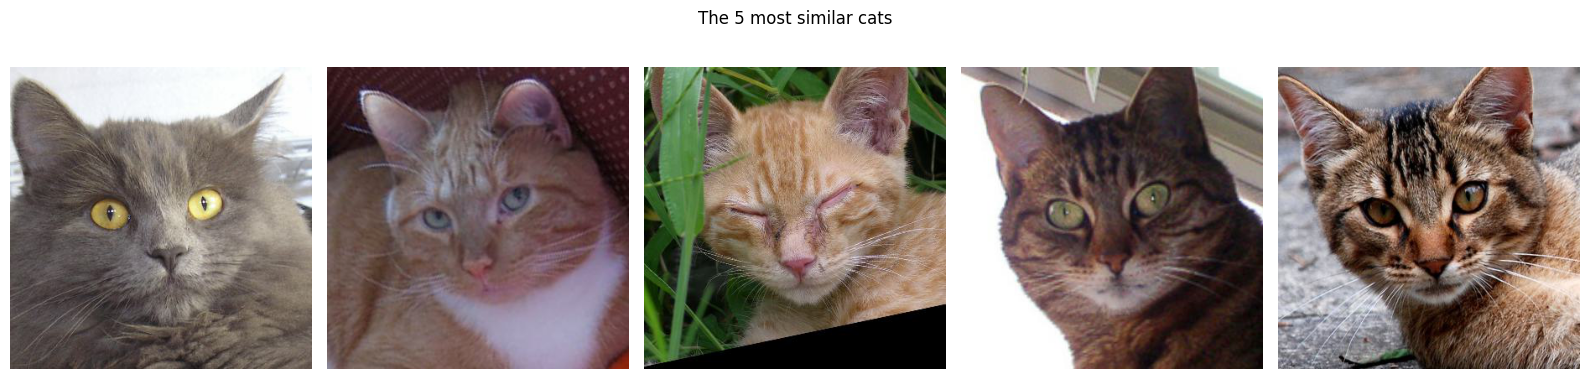

In [65]:
n_best = 5
best = np.argpartition(pca_distances, n_best)
fig, ax = plt.subplots(ncols=n_best, figsize=(16, 4))
for i in range(n_best):
    candidate_twin_cat = data_matrix[best[i], :]
    ax[i].imshow(create_u_byte_image_from_vector(candidate_twin_cat, height, width, channels))
    ax[i].axis('off')

fig.suptitle(f"The {n_best} most similar cats")
plt.tight_layout()
plt.show()
